In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = yf.download('BTC-USD', start = '2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [28]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503


In [29]:
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA200'] = df['Adj Close'].rolling(200).mean()

In [30]:
df = df.dropna()

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2017-07-19,2323.080078,2397.169922,2260.229980,2273.429932,2273.429932,1245100032,2534.961602,1562.707278
2017-07-20,2269.889893,2900.699951,2269.889893,2817.600098,2817.600098,2249260032,2545.585405,1571.803654
2017-07-21,2838.409912,2838.409912,2621.850098,2667.760010,2667.760010,1489449984,2550.783008,1580.033704
2017-07-22,2668.629883,2862.419922,2657.709961,2810.120117,2810.120117,1177129984,2557.214409,1588.865104
2017-07-23,2808.100098,2832.179932,2653.939941,2730.399902,2730.399902,1072840000,2561.515405,1596.743454
...,...,...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450,40233.490234,49088.572070
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902,40138.341953,49056.666055
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503,40037.305156,49013.388359


In [32]:
df = df[['Adj Close','MA50','MA200']]

In [33]:
df

,Adj Close,MA50,MA200
Date,,,
2017-07-19,2273.429932,2534.961602,1562.707278
2017-07-20,2817.600098,2545.585405,1571.803654
2017-07-21,2667.760010,2550.783008,1580.033704
2017-07-22,2810.120117,2557.214409,1588.865104
2017-07-23,2730.399902,2561.515405,1596.743454
...,...,...,...
2022-03-05,39400.585938,40233.490234,49088.572070
2022-03-06,38419.984375,40138.341953,49056.666055
2022-03-07,38062.039062,40037.305156,49013.388359


In [34]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA50.iloc[i] > df.MA200.iloc[i] \
    and df.MA50.iloc[i-1] < df.MA200.iloc[i-1]:
        Buy.append(i)
    elif df.MA50.iloc[i] < df.MA200.iloc[i] \
    and df.MA50.iloc[i-1] > df.MA200.iloc[i-1]:
            Sell.append(i)

In [35]:
Buy

[0, 644, 945, 1037, 1519]

In [36]:
Sell

[254, 829, 980, 1431, 1640]

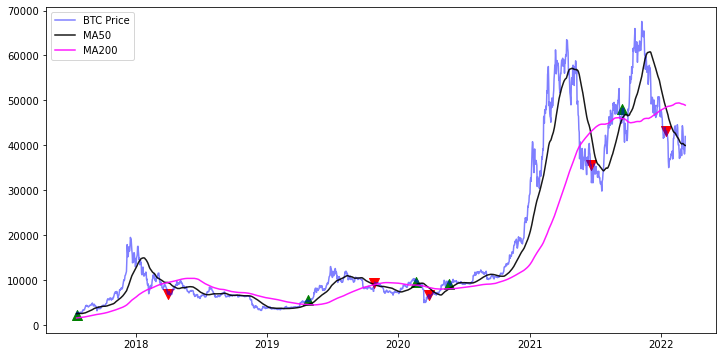

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'], label = 'BTC Price', color = 'blue', alpha = 0.5)
plt.plot(df['MA50'], label = 'MA50', color = 'k', alpha = 0.9)
plt.plot(df['MA200'], label = 'MA200', color = 'magenta', alpha = 0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker = 'v', color = 'r', s = 100)
plt.legend()
plt.show()